# GUC Clustering Project 

# Hanya Ashraf 46-0347

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [8]:
# if plotnine is not installed in Jupter then use the following command to install it 


In [9]:
!pip install plotnine

Defaulting to user installation because normal site-packages is not writeable


Running this project require the following imports 

In [151]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
import scipy.cluster.hierarchy as shc
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [11]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



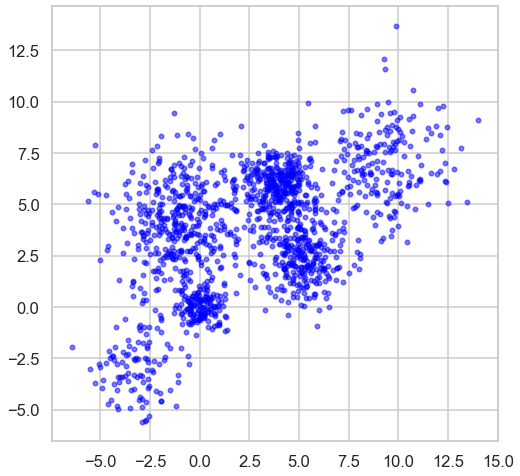

In [12]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [13]:
Multi_blob_Data  #examining the dataset

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [14]:
Multi_blob_Data.size 

2900

In [15]:
df = pd.DataFrame(Multi_blob_Data, columns = ['x','y']) #converting to a dataframe

In [16]:
df

,x,y
0,-2.354272,-3.179744
1,-2.158005,-1.020061
2,-3.304399,-3.304378
3,-0.947023,-2.002335
4,-3.610317,-2.294672
...,...,...
1445,9.240137,3.378037
1446,10.305952,7.366174
1447,9.864057,13.674604
1448,5.457008,9.931984


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

# 3 Clusters

In [125]:
kmeansclustering=KMeans(3) #for k=3
kmeansclustering.fit(df)
clusters=kmeansclustering.fit_predict(df)
Inertia3=kmeansclustering.inertia_  #saving intertia for the distorion function 
Score3=silhouette_score(df, clusters) #saving silhouette score
ClusteredDataset=df.copy() #creating a copy of the original dataset not to lose it
ClusteredDataset['3Clusters'] = clusters 

Text(0.5, 1.0, '3 Clusters')

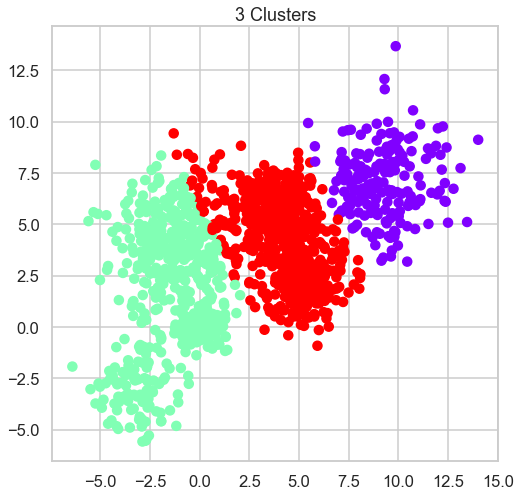

In [126]:
plt.scatter(ClusteredDataset['x'],ClusteredDataset['y'],c=ClusteredDataset['3Clusters'],cmap='rainbow')
plt.title('3 Clusters')

# 4 Clusters

In [127]:
kmeansclustering4=KMeans(4) #for k=4
kmeansclustering4.fit(df)
clusters4=kmeansclustering4.fit_predict(df)
Inertia4=kmeansclustering4.inertia_ #saving intertia for the distorion function 
Score4=silhouette_score(df, clusters4) #saving silhouette score
ClusteredDataset['4Clusters'] = clusters4 

Text(0.5, 1.0, '4 Clusters')

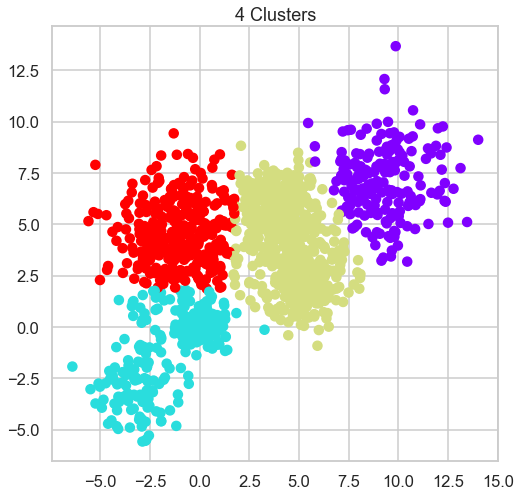

In [128]:
plt.scatter(ClusteredDataset['x'],ClusteredDataset['y'],c=ClusteredDataset['4Clusters'],cmap='rainbow') 
plt.title('4 Clusters')

# 5 Clusters

In [129]:
kmeansclustering5=KMeans(5) #for k=5
kmeansclustering5.fit(df)
clusters5=kmeansclustering5.fit_predict(df)
Inertia5=kmeansclustering5.inertia_ #saving inertia for distortion function
Score5=silhouette_score(df, clusters5) #saving silhouette score
ClusteredDataset['5Clusters'] = clusters5

Text(0.5, 1.0, '5 Clusters')

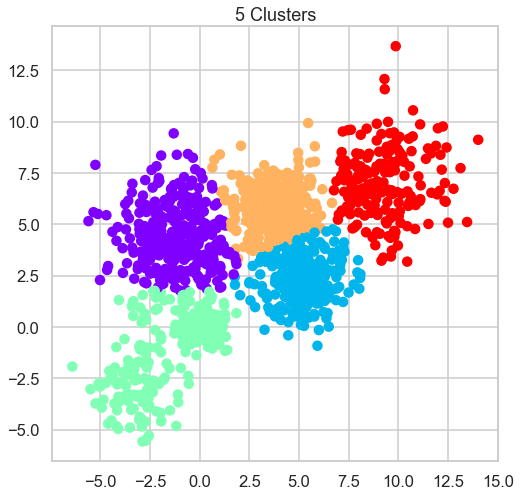

In [130]:
plt.scatter(ClusteredDataset['x'],ClusteredDataset['y'],c=ClusteredDataset['5Clusters'],cmap='rainbow')
plt.title('5 Clusters')

# 6 Clusters

In [131]:
kmeansclustering6=KMeans(6) #for k=6
kmeansclustering6.fit(df)
clusters6=kmeansclustering6.fit_predict(df)
Inertia6=kmeansclustering6.inertia_ #saving inertia for distortion function
Score6=silhouette_score(df, clusters6) #saving silhouette score
ClusteredDataset['6Clusters'] = clusters6

Text(0.5, 1.0, '6 Clusters')

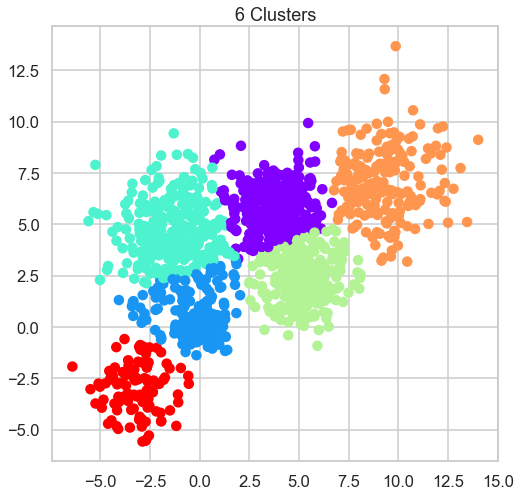

In [132]:
plt.scatter(ClusteredDataset['x'],ClusteredDataset['y'],c=ClusteredDataset['6Clusters'],cmap='rainbow')
plt.title('6 Clusters')

# K-Means Distortion Function

Text(0.5, 1.0, 'Distortions of K-Means')

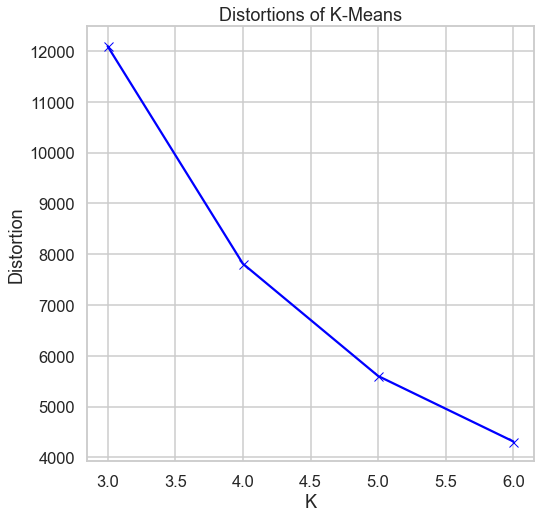

In [124]:
distortions = [Inertia3,Inertia4,Inertia5,Inertia6] 
K=[3,4,5,6]
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Distortions of K-Means')

# K-Means Silhouette Score

Text(0.5, 1.0, 'K-Means Silhouette Score')

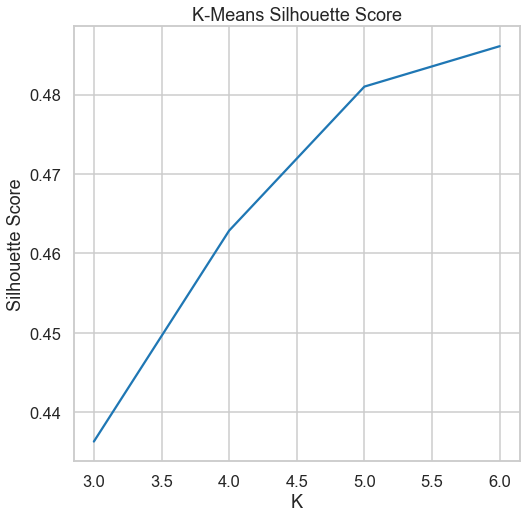

In [135]:
Scores=[Score3,Score4,Score5,Score6]
plt.plot(K, Scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('K-Means Silhouette Score')

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

0.4307906732655957


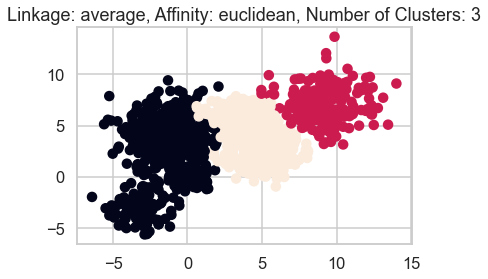

0.4490582469502603


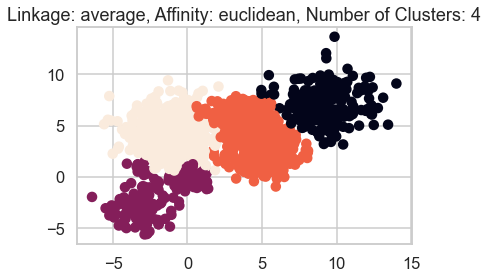

0.433187948807373


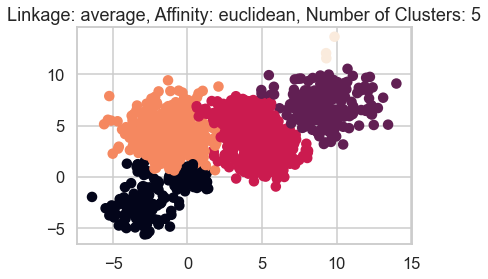

0.41478815574933364


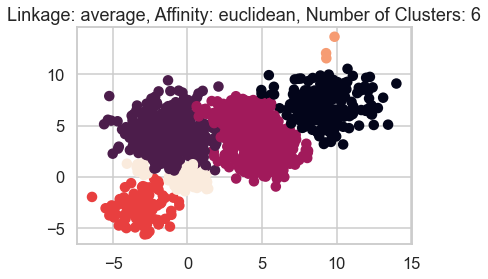

0.40908233229322877


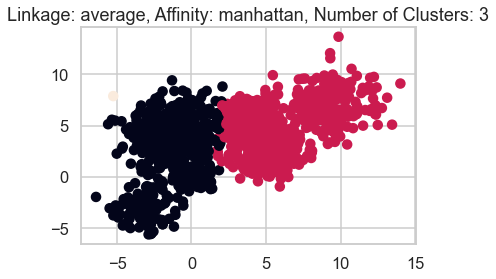

0.38321869346484616


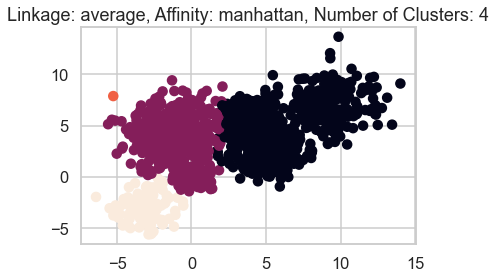

0.39540970031359807


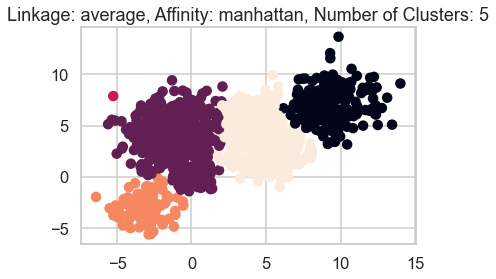

0.38029768112070367


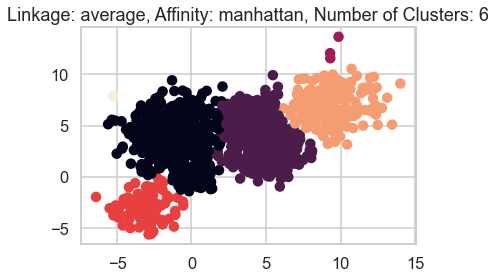

0.13500755155170832


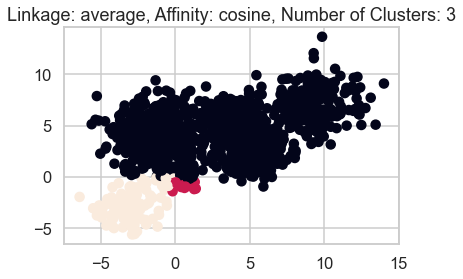

0.28022113778340446


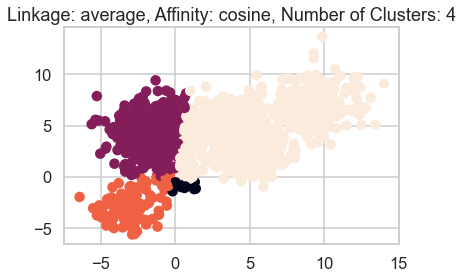

0.24927357773894548


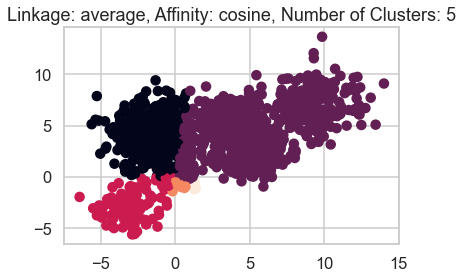

0.2035575393889621


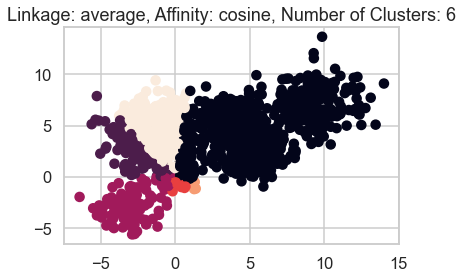

0.23622772250901033


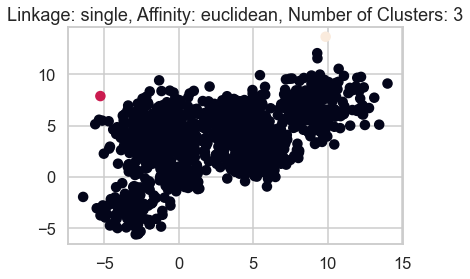

0.2074012584493559


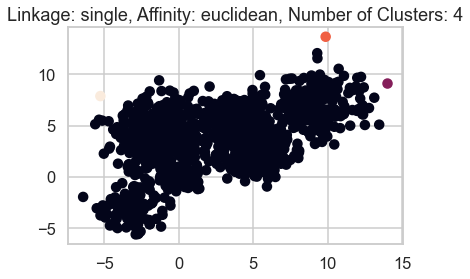

0.17400752332621522


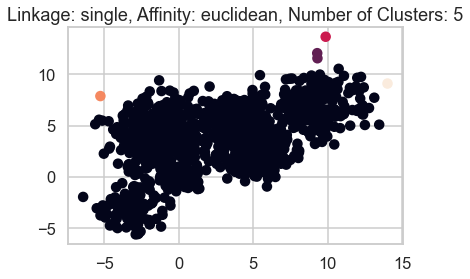

0.08705564851389591


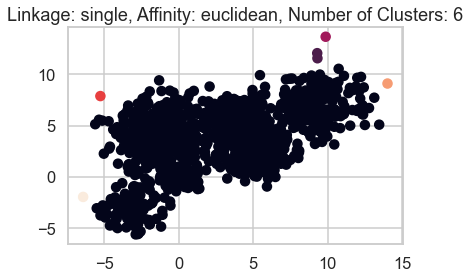

0.23622772250901033


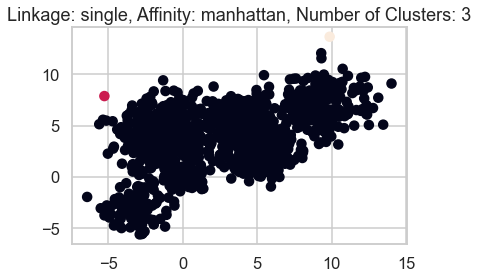

0.14871638406533946


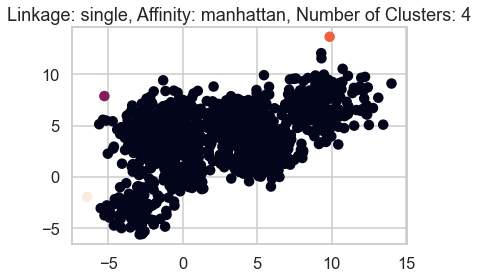

0.12029307224096318


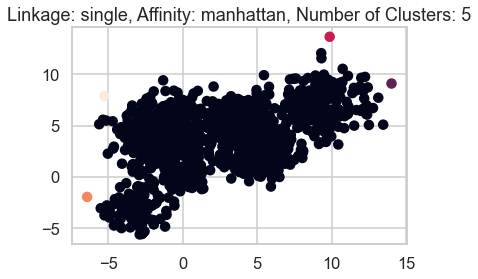

0.08705564851389591


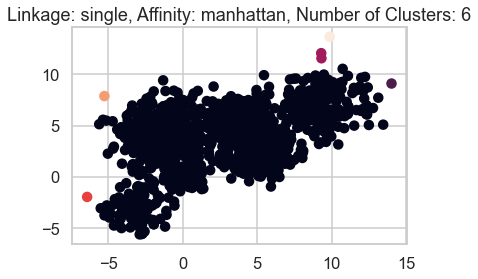

-0.027300281882024397


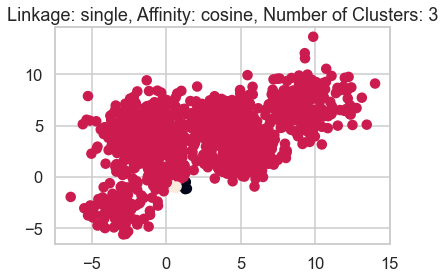

-0.03872065159633617


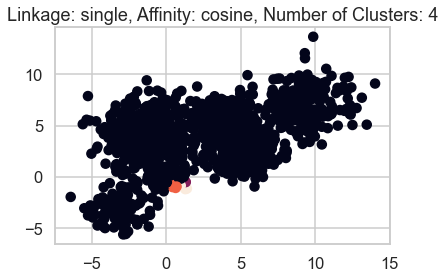

0.07699405164704985


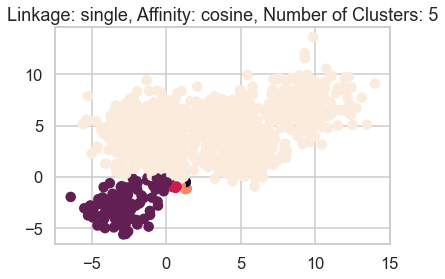

0.07162243486315635


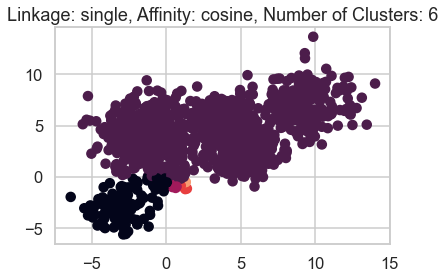

In [157]:
# AgglomerativeClustering using different affinity,linkage and number of clusters 
Affinity = ['euclidean','manhattan','cosine']
Linkage = ['average', 'single']
for i in Linkage:
    for x in Affinity:
        for k in K:
               hierarchical_cluster = AgglomerativeClustering(affinity=x, linkage=i,n_clusters=k)
               labels = hierarchical_cluster.fit_predict(df)
               print( silhouette_score(df, labels) )#silhouette score
               plt.scatter(ClusteredDataset['x'],ClusteredDataset['y'], c=labels)
               plt.title(f'Linkage: {i}, Affinity: {x}, Number of Clusters: {k}')
               plt.show()

The best silhouette score from the attempted trials results from linkage= average, affinity= euclidean and 4 clusters with value of 0.449

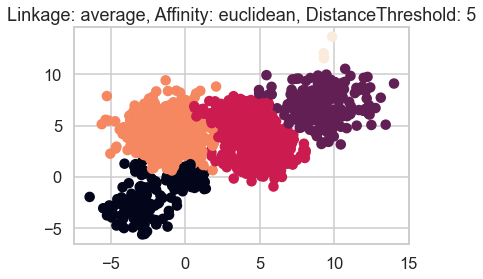

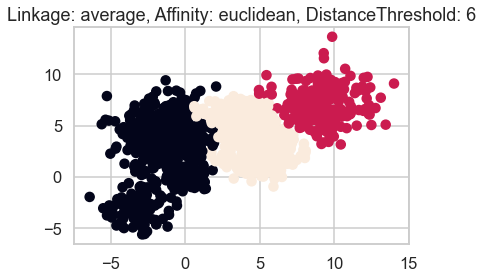

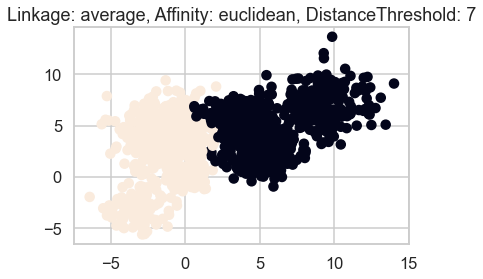

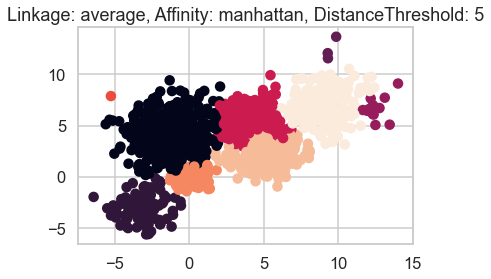

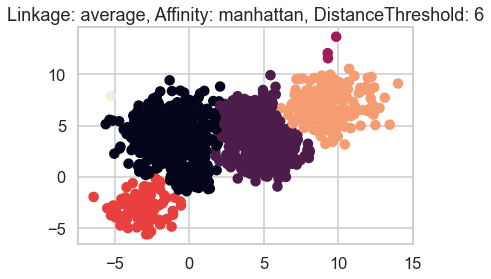

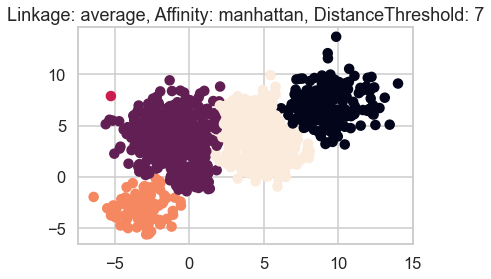

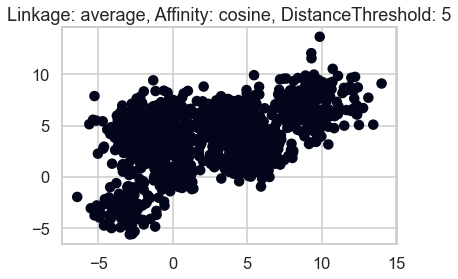

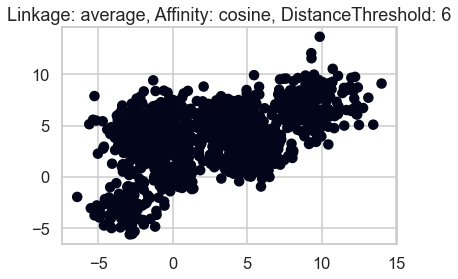

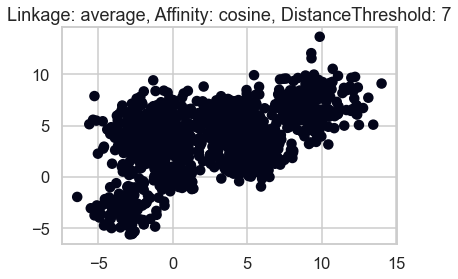

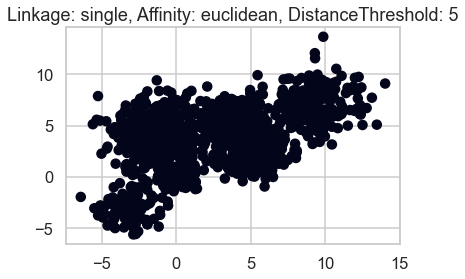

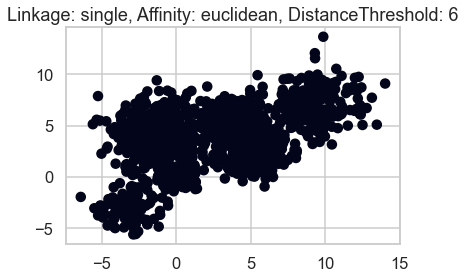

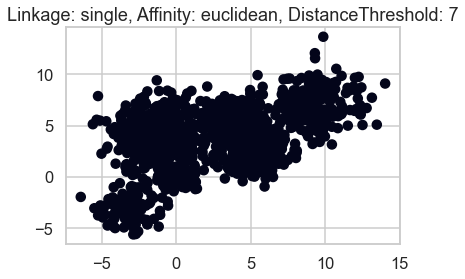

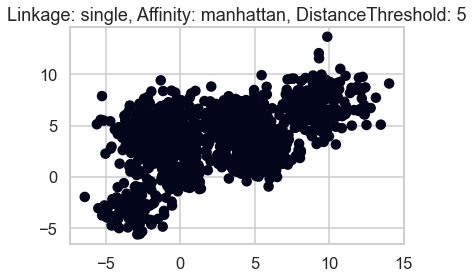

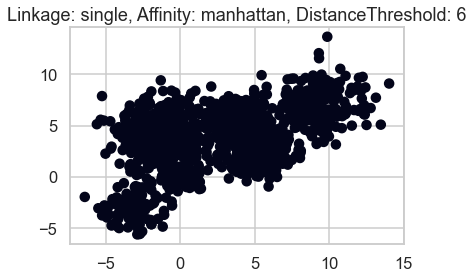

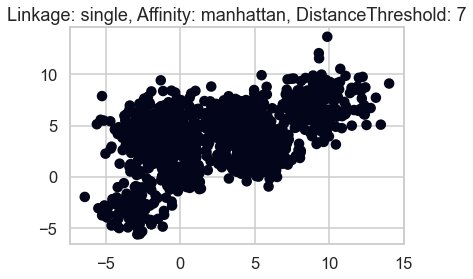

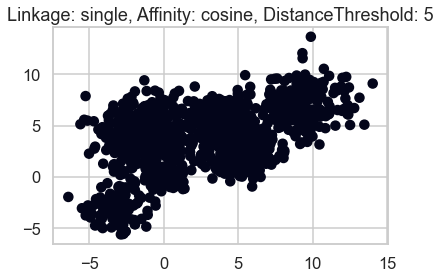

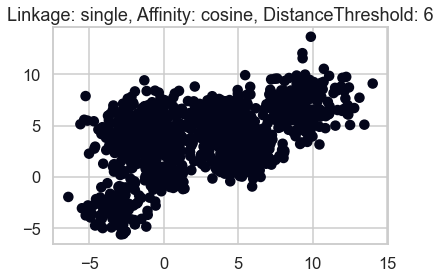

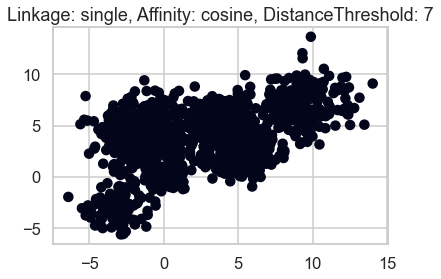

In [159]:
#trying different distance threshold, but this time the number of clusters must be set to none
Distance_Threshold=[5,6,7]
for i in Linkage:
    for x in Affinity:
        for d in Distance_Threshold:
               hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity=x, linkage=i,distance_threshold=d)
               labels = hierarchical_cluster.fit_predict(df)
               plt.scatter(ClusteredDataset['x'],ClusteredDataset['y'], c=labels)
               plt.title(f'Linkage: {i}, Affinity: {x}, DistanceThreshold: {d}')
               plt.show()
              


# Dendograph plot

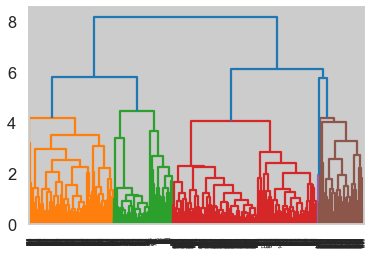

In [161]:
linkage_data = linkage(df, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

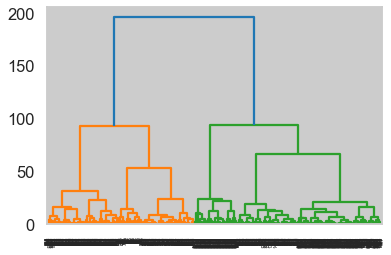

In [162]:
linkage_data = linkage(df, method='ward', metric='euclidean') #using different method
dendrogram(linkage_data)
plt.show()

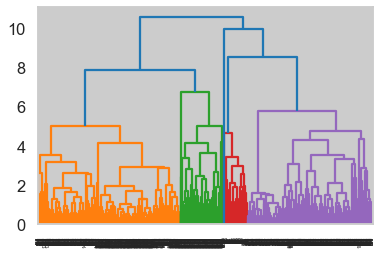

In [163]:
linkage_data = linkage(df, method='average', metric='cityblock') #using different metric 
dendrogram(linkage_data)
plt.show()

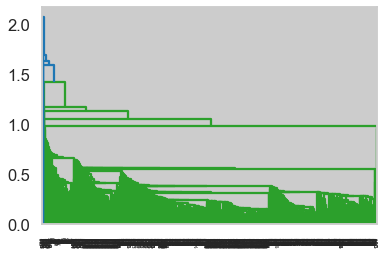

In [164]:
linkage_data = linkage(df, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

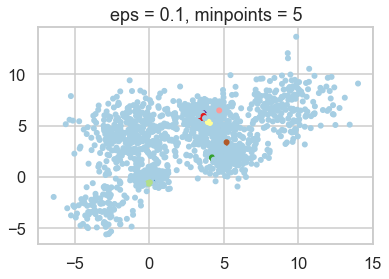

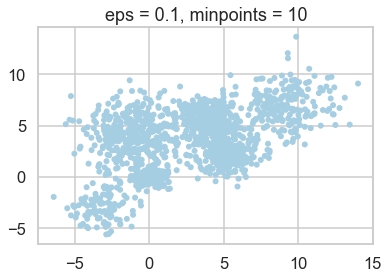

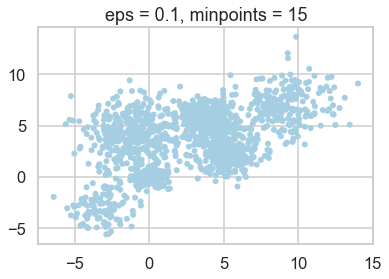

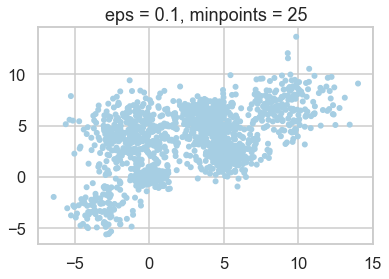

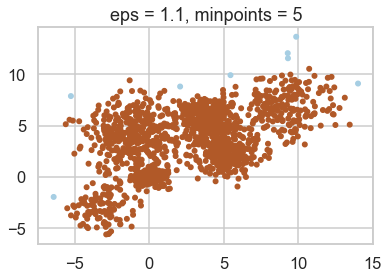

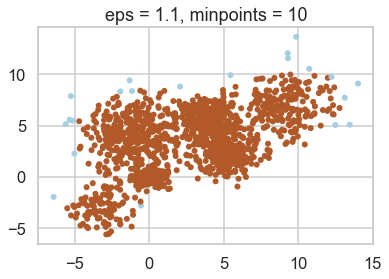

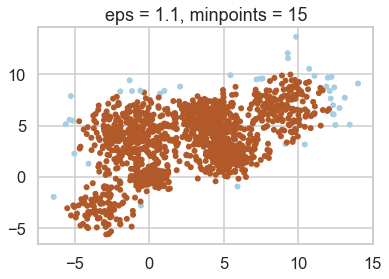

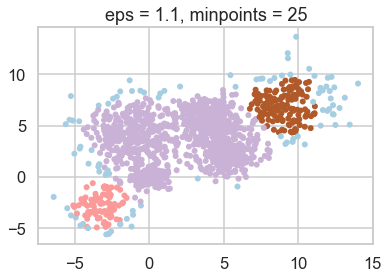

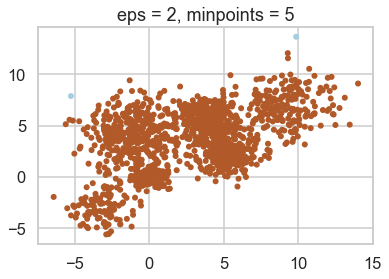

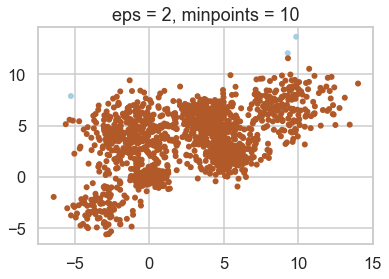

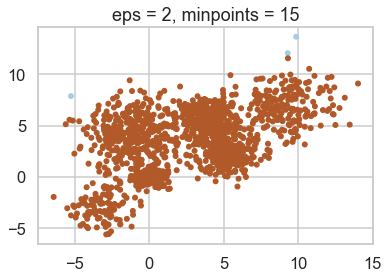

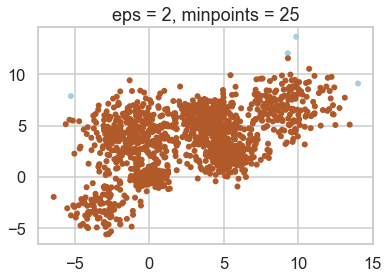

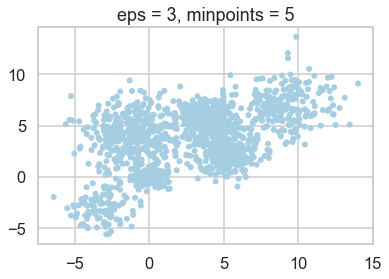

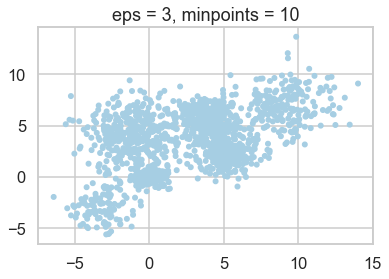

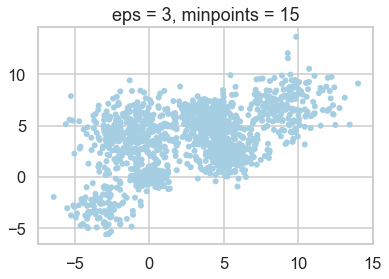

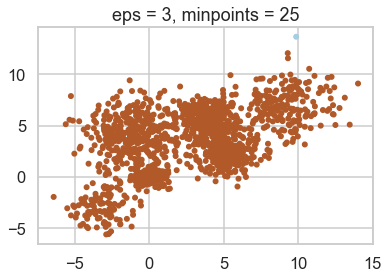

In [194]:
eps = [0.1,1.1,2,3] 
min_samples = [5,10,15,25]
bestScore = -1

for i in eps:
    for x in min_samples:
     DB = DBSCAN(eps=i, min_samples=x).fit(df)
     labels = DB.labels_
     #score = silhouette_score(df,labels)
     #if score > bestScore: 
      #  bestScore = score 
     plt.scatter(x=df["x"],y=df["y"], c=labels, cmap='Paired',s=20)
     plt.title(f'eps = {i}, minpoints = {x}')
     plt.show()



### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

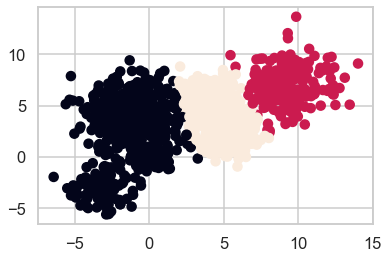

clusters = 3, covariance type = full


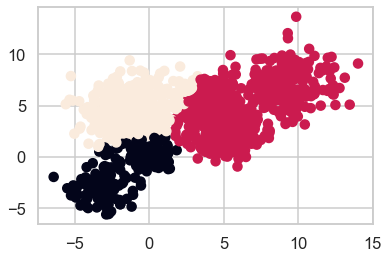

clusters = 3, covariance type = tied


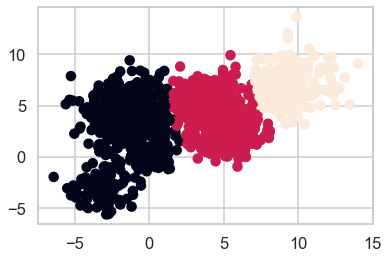

clusters = 3, covariance type = diag


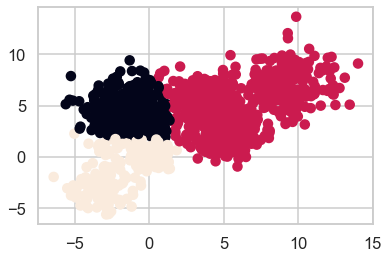

clusters = 3, covariance type = spherical


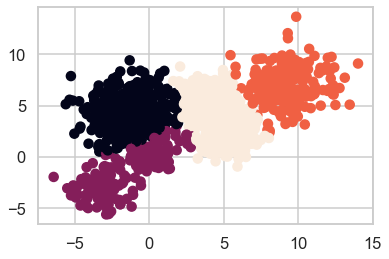

clusters = 4, covariance type = full


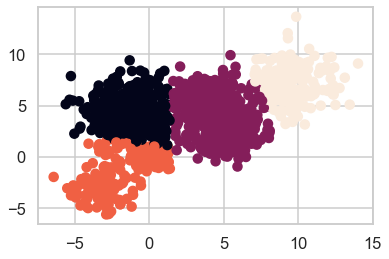

clusters = 4, covariance type = tied


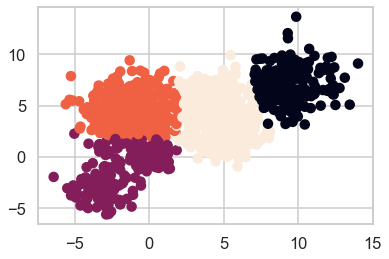

clusters = 4, covariance type = diag


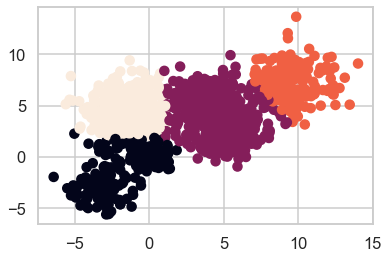

clusters = 4, covariance type = spherical


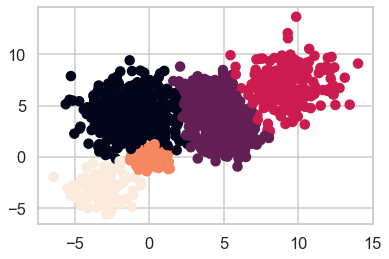

clusters = 5, covariance type = full


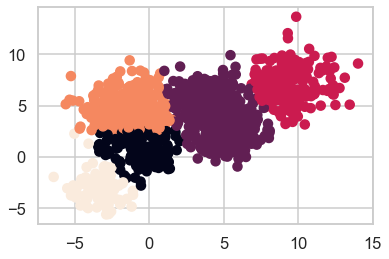

clusters = 5, covariance type = tied


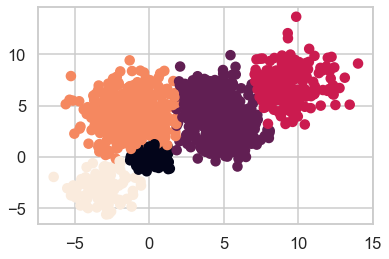

clusters = 5, covariance type = diag


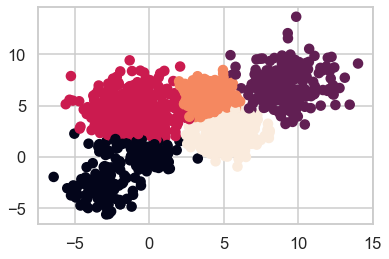

clusters = 5, covariance type = spherical


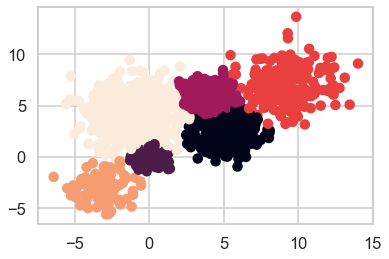

clusters = 6, covariance type = full


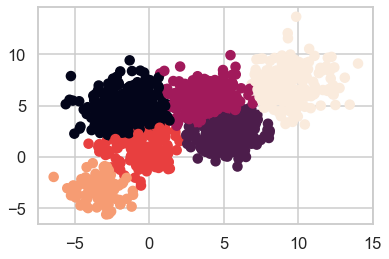

clusters = 6, covariance type = tied


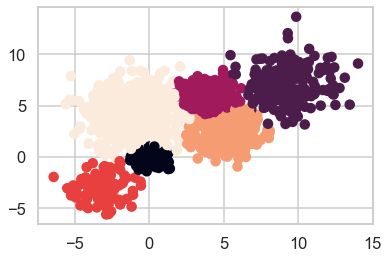

clusters = 6, covariance type = diag


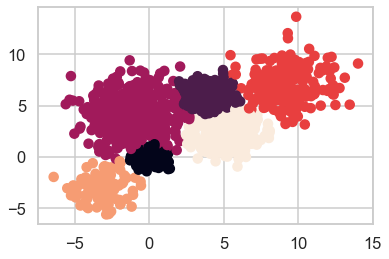

clusters = 6, covariance type = spherical


In [176]:
GMdf=df.copy() #Creating a copy of the original dataset
covariance = ["full","tied","diag","spherical"]
for k in K:
    for c in covariance:     
        G = GaussianMixture(n_components = k, covariance_type=c)
        G.fit(df)
        Gclusters = G.predict(df)
        GMdf['Gcluster'] = Gclusters
        plt.scatter(x=GMdf["x"], y=GMdf["y"], c=GMdf["Gcluster"])
        plt.show()
        print(f'clusters = {k}, covariance type = {c}')
        




## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 